In [62]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib as mlt
import mglearn
import matplotlib.font_manager as fm
mlt.rc("font", family = "NanumBarunGothic")
font_path = "C:/Program Files (x86)/Naver/NanumFont/NanumBarunGothic.ttf"
fontprop = fm.FontProperties(fname = font_path, size = 15, style='normal', weight='bold')
fontprop_1 = fm.FontProperties(fname = font_path, size = 11)

Text(0.5, 1.0, 'Unright Scaled Data/잘못 조정된 데이터')

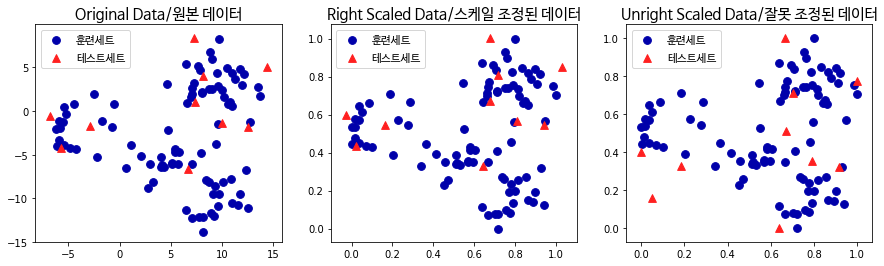

In [48]:
# Create dataset

X, _ = make_blobs(n_samples=100, centers = 5, random_state = 4, cluster_std = 2)
# seperate train, test

X_train, X_test = train_test_split(X, random_state = 5, test_size = .1)

# original scatter plot

fig, axes = plt.subplots(1, 3, figsize = (15, 4))

axes[0].scatter(X_train[:,0], X_train[:,1], c = mglearn.cm2.colors[0], label = "훈련세트", s = 60)
axes[0].scatter(X_test[:,0], X_test[:,1], marker = "^", c = mglearn.cm2.colors[1], label = "테스트세트", s = 60)
axes[0].legend(loc = "upper left", prop = fontprop_1)
axes[0].set_title("Original Data/원본 데이터", fontproperties = fontprop)

# use MinMaxScaler and transform scale

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled  = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Right Scaled Data

axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c = mglearn.cm2.colors[0], label = "훈련세트", s = 60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker = "^", c = mglearn.cm2.colors[1], label = "테스트세트", s = 60)
axes[1].legend(loc = "upper left", prop = fontprop_1)
axes[1].set_title("Right Scaled Data/스케일 조정된 데이터", fontproperties = fontprop)

# Unright Scaled Data
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c = mglearn.cm2.colors[0], label = "훈련세트", s = 60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:,1], marker = "^", c = mglearn.cm2.colors[1], label = "테스트세트", s = 60)
axes[2].legend(loc = "upper left", prop = fontprop_1)
axes[2].set_title("Unright Scaled Data/잘못 조정된 데이터", fontproperties = fontprop)

In [58]:
# how to effective scaled data in Supervised Learning
# Load cancer data
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

# original score (not scaled)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.63


W:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [60]:
# use MinMaxScaler & score

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled  = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트 정확도: 0.97


W:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [63]:
# use StandardScaler & score

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled  = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트 정확도: 0.96
